# Time Series Seasonal Decomposition

This notebook demonstrates how to decompose a time series into its core components: trend, seasonality, and residual noise with the help of Airline passengers dataset.

#### Objectives
- Break down a time series into its fundamental components
- Understand the role of each component (trend, seasonality, residuals)
- Visualize and interpret each component separately
- Learn how to use statsmodels' seasonal_decompose function

#### Background
Time series decomposition helps us understand different patterns in our data:
- Trend: Long-term progression (increasing, decreasing, or stable)
- Seasonality: Regular patterns that repeat over fixed intervals
- Noise: Random variations that don't fit trend or seasonal patterns


In [7]:
# lib imports 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

import statsmodels.api as sm

# plt.style.use("ggplot")
# rcParams["figure.figsize"] = [12, 9]
# rcParams["xtick.labelsize"] = 15
# rcParams["ytick.labelsize"] = 15
# rcParams["font.size"] = 15

import warnings
warnings.filterwarnings("ignore")

In [11]:
timeseries_df = pd.read_csv('/home/dataminer/workspace/time-series/datasets/real_world/international-airline-passengers.csv',
                     parse_dates=["Month"], index_col="Month")

timeseries_df.rename(columns={'International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60':'airline_passengers_in_thousands'},inplace=True)
timeseries_df.head(5)

,airline_passengers_in_thousands
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [12]:
timeseries_df.isna().sum()

airline_passengers_in_thousands    0
dtype: int64

In [13]:
# Convert the index to DatetimeIndex with a frequency of 'MS' (month start)
timeseries_df.index = pd.to_datetime(timeseries_df.index, format='%Y-%m-%d')
timeseries_df = timeseries_df.asfreq('MS')
timeseries_df.head(5)

,airline_passengers_in_thousands
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


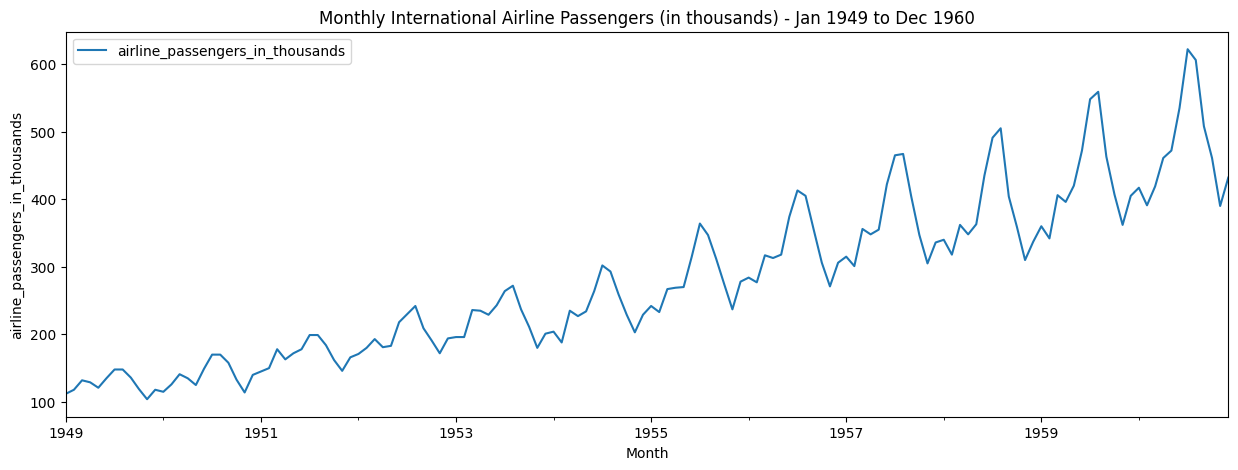

In [14]:
timeseries_df.plot(figsize=(15, 5))
plt.title("Monthly International Airline Passengers (in thousands) - Jan 1949 to Dec 1960")
plt.xlabel("Month")
plt.ylabel("airline_passengers_in_thousands");

It obvious and visibly clear that international airline passengers went up from 1949 to 1960. But there isn't much that can be learnt by looking at above plot alone. 

## Seasonal Component 

<Axes: xlabel='Month'>

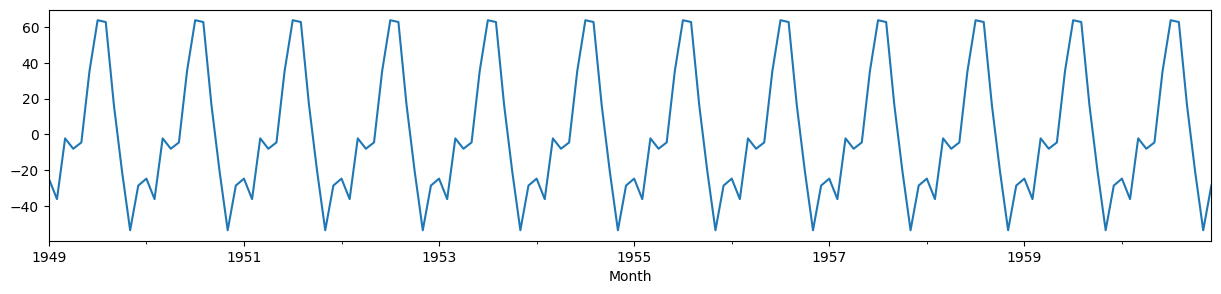

In [18]:
# plot seasonal component

decomposition = sm.tsa.seasonal_decompose(timeseries_df['airline_passengers_in_thousands'])
rcParams["figure.figsize"] = 15, 3
decomposition.seasonal.plot()

This plot shows the seasonal component extracted from the airline passenger data using seasonal decomposition. The repeating pattern reveals a clear annual cycle in passenger numbers, with peaks occurring around the same time each year (likely during summer months) and troughs in the off-season. The consistency of this pattern from 1949 to 1960 indicates a strong and stable seasonal effect in international air travel, with amplitude of roughly ±60 thousand passengers. This visualization helps understand the pure seasonal variations in passenger numbers, independent of any other patterns in the data.
<br>
<br>
**Wondering why this plot has negative values?** <br> <br>
When you look at this seasonal pattern, think of it like this: the negative values are showing the "slower" months - times when there were fewer passengers than usual. Like how airports feel pretty empty in certain months. The positive values show the busy months when airports are packed and flights are full.
<br>
<br>
The cool thing is, these ups and downs repeat every year like clockwork. So when you see -40 on the graph, that tells you there were about 40,000 fewer travelers than a typical month. And those peaks around +60? Those were the super busy months with 60,000 more passengers than usual.
<br>
<br>
The pattern zeros out over a year, kind of like how a see-saw balances - for every up there's a down. This way, we can clearly see which months are naturally busier or slower for air travel, regardless of how the airline industry was growing overall during these years.

<Axes: xlabel='Month'>

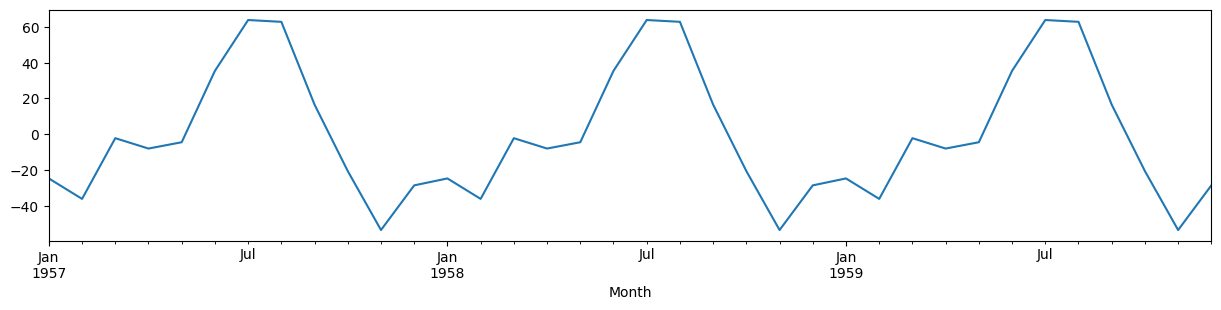

In [20]:
# subset of seasonal component for 2 years 
rcParams["figure.figsize"] = 15, 3
decomposition.seasonal["1957":"1959"].plot()

## Trend Component 

<Axes: xlabel='Month'>

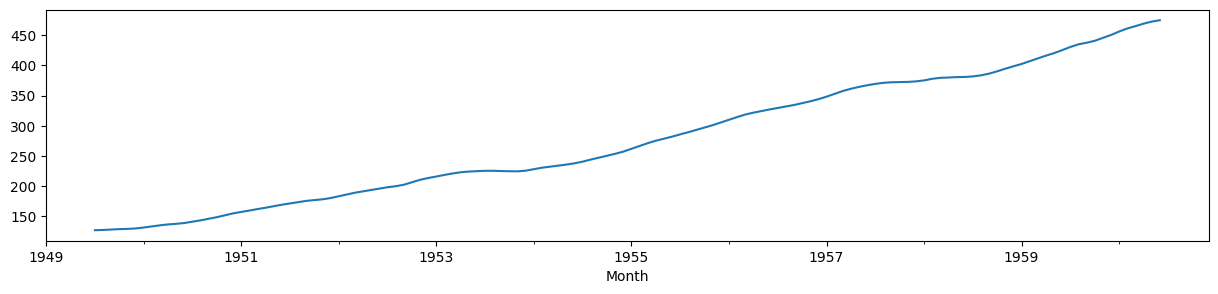

In [21]:
# plot the trend component 
decomposition.trend.plot()

The code decomposition.trend.plot() extracts and plots the long-term trend from our airline passenger data, stripping away all the seasonal ups and downs we saw earlier. <br> <br>
Looking at this line, it tells quite a story about air travel from 1949 to 1960. We're seeing a steady climb from about 150,000 passengers to over 450,000 passengers - that's triple the number in just 11 years! What's interesting is that this wasn't just a straight line up - you can see the growth was a bit slower in the early '50s, then picked up speed towards the late '50s. This really shows how air travel was becoming more and more common during this post-war period, as more people could afford to fly and international travel became more accessible.

## Noise 

<Axes: xlabel='Month'>

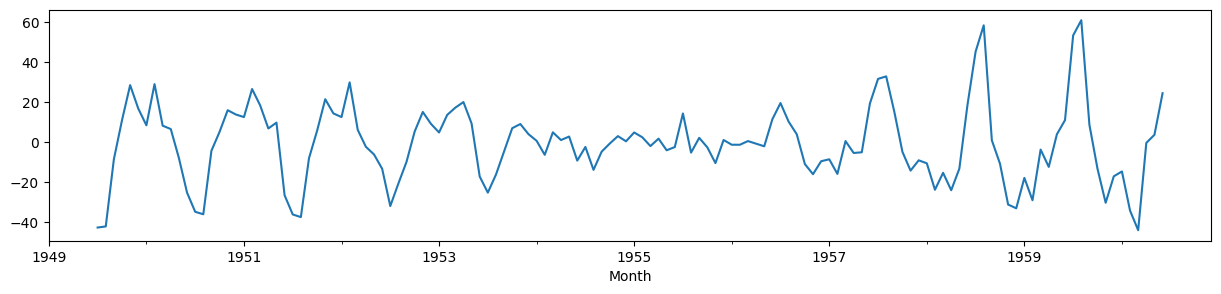

In [22]:
decomposition.resid.plot()

The code decomposition.resid.plot() shows us what's left in our data after we've taken out both the predictable seasonal patterns and the long-term trend. This is basically the "unexpected" part of our passenger numbers.<br><br>
Looking at this plot, we can see random ups and downs that didn't fit into our seasonal or trend patterns. Most of these variations stay within about 20,000 passengers up or down, though there are some bigger spikes towards the late 1950s reaching up to 60,000 passengers. These could be due to all sorts of things - maybe a big international event brought extra travelers, or bad weather caused fewer flights, or even changes in ticket prices. It's interesting to note that these random fluctuations seem to get bigger over time, which makes sense since the overall number of passengers was growing too.